# Business Problem <hr>
Masalah bisnis yang dihadapi adalah churn pelanggan yang tinggi di industri telekomunikasi. Hal ini dapat mempengaruhi keuntungan perusahaan dan reputasi merek, sehingga perusahaan perlu mengambil tindakan untuk mempertahankan pelanggan yang ada.

# Objective Analisis <hr>
Tujuan analisis adalah mengidentifikasi faktor-faktor yang berkontribusi terhadap churn pelanggan dan mengembangkan strategi retensi pelanggan yang efektif berdasarkan temuan analisis.

# Library

In [1]:
#======= Pandas confiq =====
import pandas as pd
from pandas_dq import dq_report,Fix_DQ

#==== Numpy ======
import numpy as np

#===== Visualization =====
import matplotlib.pyplot as plt
import seaborn as sns


#====== Stats =====
from statsmodels.stats.proportion import proportions_ztest



# ==== Function =====

def bar_stack(df,col_x,col_y='churn'):

    # create crosstab and normalize the values
    ct = pd.crosstab(df[col_x], df[col_y])
    ct_pct = ct.apply(lambda x: x / x.sum(), axis=1)

    # plot stacked horizontal bar chart
    ax = ct_pct.plot(kind='barh', stacked=True, color=['#1f77b4', 'red'])

    # add annotations
    for i in ax.containers:
        # get the sum of values in each container
        total = sum(j.get_width() for j in i)
        
        for j in i:
            # get the width and height of the bar
            width = j.get_width()
            height = j.get_height()
            
            # calculate the position of the text
            x = j.get_x() + width / 2
            y = j.get_y() + height / 2
            
            # format the text as percentage
            text = f'{width:.0%}'
            
            # set the position and format of the annotation
            ax.annotate(text, xy=(x, y), xytext=(0, 0), textcoords='offset points',
                        ha='center', va='center', color='white', fontsize=12,
                        fontweight='bold')

    # set plot title and labels
    ax.set_title(f'Churn Rate by {col_x}')
    ax.set_xlabel('Number of Customers')
    ax.set_ylabel(f'{col_x}')

    # show the plot
    plt.legend(title='Churn', loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

Imported pandas_dq (1.9). Always upgrade to get latest version.



# Load Dataset

In [2]:
df = pd.read_csv("telco_churn.csv")

# Data Cleaning

In [3]:
dq_report(df,verbose=1)

C:\Users\bayuz\AppData\Local\Temp\ipykernel_5924\1445667955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dq_report(df,verbose=1)


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
customerID,object,0.000000,100,0002-ORFBO,9995-HOTOH,"Possible ID colum: drop before modeling process., 7043 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 7043 unique values: Use hash encoding or embedding to reduce dimension."
gender,object,0.000000,0,Female,Male,No issue
SeniorCitizen,int64,0.000000,0,0,1,has 1142 outliers greater than upper bound (0.0) or lower than lower bound(0.0). Cap them or remove them.
Partner,object,0.000000,0,No,Yes,No issue
Dependents,object,0.000000,0,No,Yes,No issue
tenure,int64,0.000000,1,0,72,No issue
PhoneService,object,0.000000,0,No,Yes,No issue
MultipleLines,object,0.000000,0,No,Yes,No issue
InternetService,object,0.000000,0,DSL,No,No issue
OnlineSecurity,object,0.000000,0,No,Yes,No issue


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
customerID,object,0.0,100,0002-ORFBO,9995-HOTOH,Possible ID colum: drop before modeling proces...
gender,object,0.0,0,Female,Male,No issue
SeniorCitizen,int64,0.0,0,0,1,has 1142 outliers greater than upper bound (0....
Partner,object,0.0,0,No,Yes,No issue
Dependents,object,0.0,0,No,Yes,No issue
tenure,int64,0.0,1,0,72,No issue
PhoneService,object,0.0,0,No,Yes,No issue
MultipleLines,object,0.0,0,No,Yes,No issue
InternetService,object,0.0,0,DSL,No,No issue
OnlineSecurity,object,0.0,0,No,Yes,No issue


Dari hasil analisis di atas, dapat disimpulkan bahwa customerID memiliki nilai unique yang banyak sehingga tidak perlu diikutsertakan dalam analisis selanjutnya. Selain itu, perlu dilakukan identifikasi pada data dari total charge yang belum terbaca sebagai tipe numerik sehingga perlu di idetinfikasi.

In [4]:
df[df["TotalCharges"]==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


kita melihat bahwa 11 baris yang tidak isi data dari total charge berupa spasi, dan jika di perhatikan semua customer ini memiliki tenure 0. kemungkinan mereka ini adalah customer baru sehingga tidak memiliki catatan total charge sebelumnya. Untuk analisa selanjutnya akan di lakukan filter tenur diatas 0 dan juga dilakukan conversi tipe data menjadi numerik untuk kolom total charge dengan menggunakan ``` pd.to_numeric()```

In [5]:
#convert total charge ke numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')


#filter data tenure diatas 0
df = df.query('tenure > 0')

#drop customerid
df = df.drop('customerID',axis=1).reset_index(drop=True)

#check again
dq_report(df,verbose=1)

Alert: Dropping 22 duplicate rows can sometimes cause column data types to change to object. Double-check!


C:\Users\bayuz\AppData\Local\Temp\ipykernel_5924\2826258558.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dq_report(df,verbose=1)


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
gender,object,0.000000,0,Female,Male,No issue
SeniorCitizen,int64,0.000000,0,0,1,has 1141 outliers greater than upper bound (0.0) or lower than lower bound(0.0). Cap them or remove them.
Partner,object,0.000000,0,No,Yes,No issue
Dependents,object,0.000000,0,No,Yes,No issue
tenure,int64,0.000000,1,1,72,No issue
PhoneService,object,0.000000,0,No,Yes,No issue
MultipleLines,object,0.000000,0,No,Yes,No issue
InternetService,object,0.000000,0,DSL,No,No issue
OnlineSecurity,object,0.000000,0,No,Yes,No issue
OnlineBackup,object,0.000000,0,No,Yes,No issue


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
gender,object,0.0,0,Female,Male,No issue
SeniorCitizen,int64,0.0,0,0,1,has 1141 outliers greater than upper bound (0....
Partner,object,0.0,0,No,Yes,No issue
Dependents,object,0.0,0,No,Yes,No issue
tenure,int64,0.0,1,1,72,No issue
PhoneService,object,0.0,0,No,Yes,No issue
MultipleLines,object,0.0,0,No,Yes,No issue
InternetService,object,0.0,0,DSL,No,No issue
OnlineSecurity,object,0.0,0,No,Yes,No issue
OnlineBackup,object,0.0,0,No,Yes,No issue


permasalahan tipe data pada total charges telah di atasi, selanjutnya adalah memeriksa inkonsisten data

In [6]:
#make columns to lower case
df.columns = [x.lower() for x in df.columns]

#check unique value for identify inconsisten data
for x in df.columns:
    print(f"========== Unique Value for {x}==========")
    print(f"{df[x].unique()} \n")

========== Unique Value for gender==========
['Female' 'Male'] 

========== Unique Value for seniorcitizen==========
[0 1] 

========== Unique Value for partner==========
['Yes' 'No'] 

========== Unique Value for dependents==========
['No' 'Yes'] 

========== Unique Value for tenure==========
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

========== Unique Value for phoneservice==========
['No' 'Yes'] 

========== Unique Value for multiplelines==========
['No phone service' 'No' 'Yes'] 

========== Unique Value for internetservice==========
['DSL' 'Fiber optic' 'No'] 

========== Unique Value for onlinesecurity==========
['No' 'Yes' 'No internet service'] 

========== Unique Value for onlinebackup==========
['Yes' 'No' 'No internet service'] 

========== Unique Value for deviceprotection==========
['No' 'Yes' 'No

Data di atas tidak termasuk dalam kategori data inkonsisten, karena data tersebut merupakan data kategorikal yang mungkin saja memiliki tiga kategori yang berbeda (Yes, No, dan No internet service) pada setiap kolomnya. Kategori "No internet service" menunjukkan bahwa pelanggan tidak menggunakan layanan internet, sehingga tidak relevan untuk kolom yang berkaitan dengan layanan internet seperti onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, dan streamingmovies. Oleh karena itu, data tersebut masih konsisten dan dapat digunakan untuk analisis lebih lanjut.

# Eksploratory Data Analytics

## Statistic Descriptive <hr>
- Melakukan analisis deskriptif pada data pelanggan untuk memahami karakteristik pelanggan yang berpotensi churn, seperti umur, jenis kelamin, status pernikahan, dan sebagainya.
- Menghitung rata-rata, median, dan deviasi standar dari tagihan bulanan, total tagihan, dan durasi kontrak pelanggan.
- Melakukan analisa churn rate dari fitur untuk melihat churn rate tertinggi.
- Memriksa apakah terdapat korelasi dari tiap fitur yang berhubungan dengan target.

In [7]:
# descriptive for churn
df.query("churn == 'Yes'").describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


Dari statistik deskriptif tersebut, terlihat bahwa: <br>
- Rata-rata usia pelanggan yang churn adalah 0.25 (dalam kategori senior citizen), dengan nilai standar deviasi sebesar 0.44. <br>
- Rata-rata tenure atau masa berlangganan pelanggan yang churn adalah 17.98 bulan, dengan standar deviasi 19.53 bulan. Nilai minimum tenure adalah 1 bulan dan nilai maksimum adalah 72 bulan. <br>
- Rata-rata biaya bulanan pelanggan yang churn adalah 74.44 dollar, dengan standar deviasi 24.67 dollar. Nilai minimum biaya bulanan adalah 18.85 dollar dan nilai maksimum adalah 118.35 dollar. <br>
- Rata-rata total biaya pelanggan yang churn adalah 1531.80 dollar, dengan standar deviasi 1890.82 dollar. Nilai minimum total biaya adalah 18.85 dollar dan nilai maksimum adalah 8684.80 dollar. <br>

Dari data ini, dapat ditarik beberapa insight dan penjelasan yang menarik, seperti: <br>
- Pelanggan yang churn mayoritas adalah non-senior citizen (75.53%), tetapi ada sekitar 25.47% pelanggan yang churn merupakan senior citizen. <br>
- Masa berlangganan (tenure) pelanggan churn memiliki nilai rata-rata yang relatif rendah (17.98 bulan), artinya mayoritas pelanggan yang churn telah menggunakan layanan selama kurang dari 2 tahun. <br>
- Biaya bulanan (monthly charges) pelanggan churn memiliki rata-rata yang relatif rendah (74.44 dollar), namun dengan standar deviasi yang cukup tinggi (24.67 dollar), sehingga ada pelanggan churn dengan biaya bulanan yang sangat rendah (18.85 dollar) atau sangat tinggi (118.35 dollar). <br>
- Total biaya (total charges) pelanggan churn memiliki rata-rata yang cukup tinggi (1531.80 dollar), namun dengan standar deviasi yang cukup tinggi juga (1890.82 dollar), sehingga ada pelanggan churn dengan total biaya yang sangat rendah (18.85 dollar) atau sangat tinggi (8684.80 dollar).

In [8]:
df.query("churn == 'Yes'").describe(include='object').T

,count,unique,top,freq
gender,1869,2,Female,939
partner,1869,2,No,1200
dependents,1869,2,No,1543
phoneservice,1869,2,Yes,1699
multiplelines,1869,3,Yes,850
internetservice,1869,3,Fiber optic,1297
onlinesecurity,1869,3,No,1461
onlinebackup,1869,3,No,1233
deviceprotection,1869,3,No,1211
techsupport,1869,3,No,1446


Mayoritas pelanggan yang churn adalah pelanggan dengan kontrak bulanan dan mayoritas juga menggunakan Fiber optic sebagai layanan internet mereka.
Lebih dari 60% pelanggan yang churn tidak memiliki layanan tambahan seperti online security, online backup, device protection, dan tech support.
Lebih dari setengah pelanggan yang churn memilih pembayaran menggunakan electronic check dan mayoritas pelanggan juga memilih paperless billing.
Pelanggan yang churn mayoritas adalah pelanggan individu (tidak memiliki pasangan atau tanggungan).

### Visualization

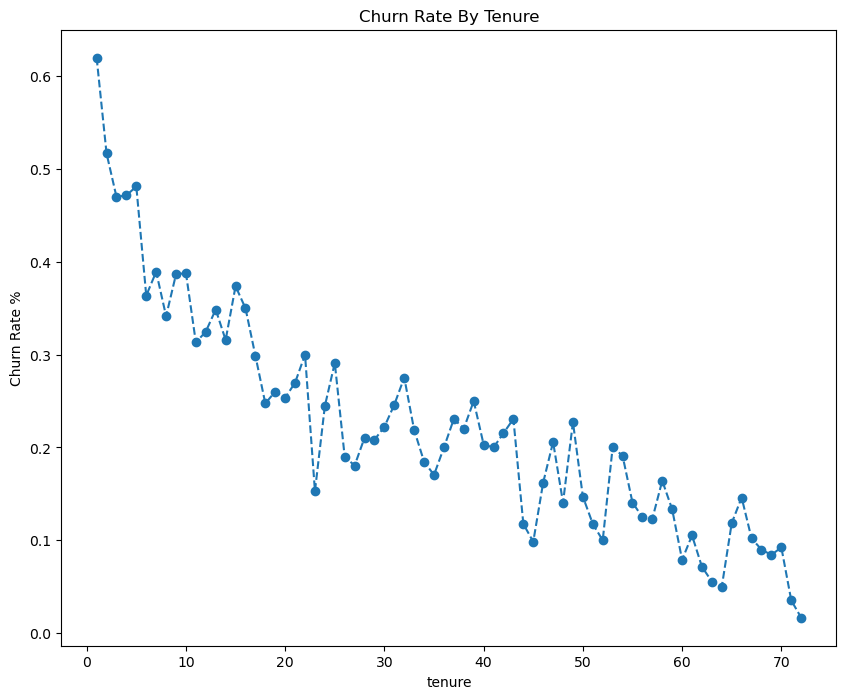

In [9]:
#convert churn yes and no to be 1 and 0
df['churn'] = df['churn'].replace(['Yes','No'],[1,0])


#calculate churn rate from tenur
df.groupby('tenure')['churn'].mean().plot(linestyle='--',
                                   marker='o',
                                   figsize=(10,8),
                                   title='Churn Rate By Tenure')
plt.ylabel("Churn Rate %");

Data menunjukkan bahwa churn rate (persentase pelanggan yang berhenti berlangganan) cenderung tinggi pada pelanggan dengan tenure rendah. Pelanggan dengan tenure 1 memiliki churn rate tertinggi yaitu 61,99%. <br>
Terdapat kemungkinan bahwa pelanggan dengan tenure rendah dan churn rate tinggi kebanyakan berasal dari kontrak bulanan, karena pelanggan yang berlangganan kontrak bulanan cenderung lebih mudah untuk berhenti berlangganan jika mereka tidak puas dengan layanan yang diberikan. Namun, hal ini masih perlu diperiksa dengan memeriksa data mengenai kontrak yang dipilih oleh pelanggan yang churn.

<Axes: xlabel='contract', ylabel='count'>

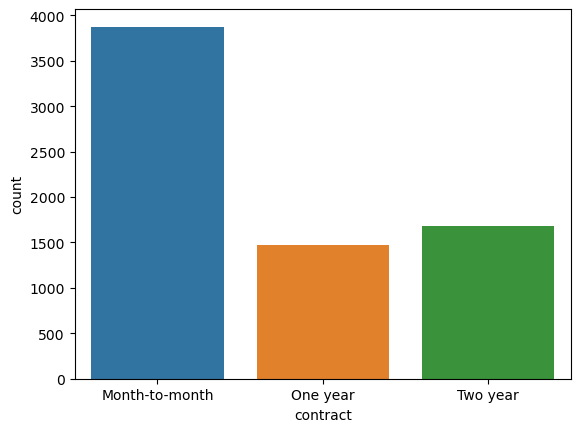

In [10]:
sns.countplot(data=df,x='contract')

kebanyakkan pelanggan memilih untuk menggunakan contract jenis month-to-month

<Axes: xlabel='contract', ylabel='tenure'>

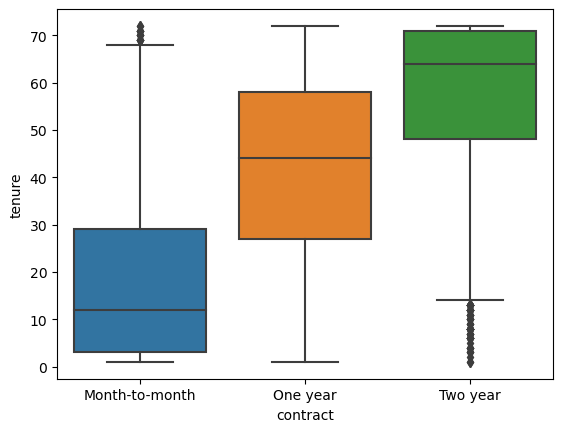

In [11]:
sns.boxplot(data=df,x='contract',y='tenure')

mayoritas customer yang mengambil kontrak month-to-month memiliki tenure +- 5 hingga 30

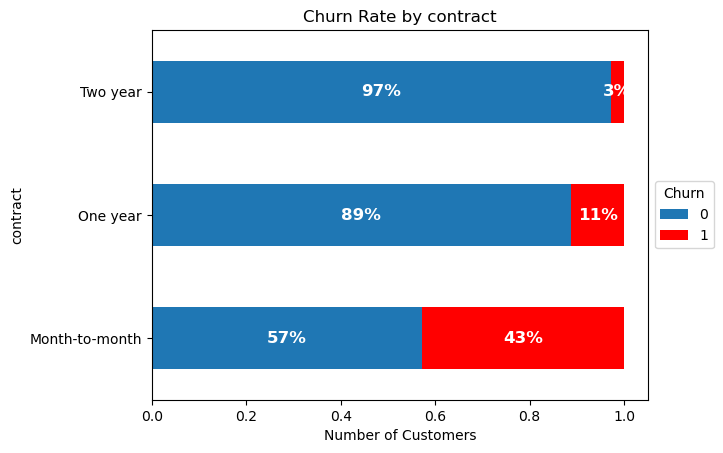

In [12]:
bar_stack(df,'contract')

Terlihat bahwa pelanggan yang memiliki kontrak bulanan (month-to-month) memiliki churn rate yang jauh lebih tinggi dibandingkan dengan pelanggan yang memiliki kontrak satu tahun atau dua tahun. Lebih dari setengah (57.29%) dari pelanggan dengan kontrak bulanan berhenti berlangganan (churn), sedangkan pelanggan dengan kontrak satu tahun dan dua tahun memiliki churn rate yang jauh lebih rendah, yakni masing-masing 11.28% dan 2.85%. Hal ini menunjukkan bahwa pelanggan dengan kontrak bulanan cenderung lebih tidak setia dan lebih mudah untuk berhenti berlangganan.

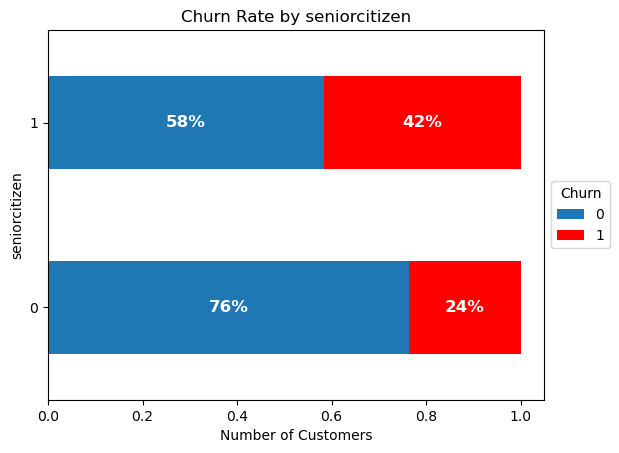

In [13]:
bar_stack(df,'seniorcitizen')

terlihat bahwa kebanyakkan dari senior citizen memiliki churn rate yang tinggi dibandingkan dengan yang bukan senior citizen

gender,Female,Male
churn,,
0,2544,2619
1,939,930


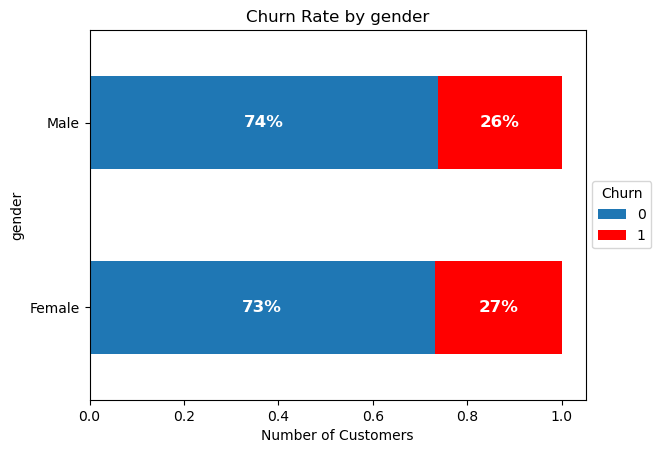

In [14]:
display(pd.crosstab(df['churn'],df['gender']))
bar_stack(df,'gender')

Untuk gender, secara visual terlihat bahwa gender tidak memiliki perbedaan yang signifikant churn. perlu dilakukan pengujian apakah secara statistik terdapat perbedaan yang signifikan. <br>
H0 : Male and Female tidak memiliki perbedaan yang signifikan terhadap churn. <br>
H1 : Male and Female memiliki perbedaan yang signifikan terhadap churn.

In [15]:
counts = df.groupby('gender')['churn'].sum().reset_index()
nobs = df.groupby('gender').size().reset_index()
nobs = nobs.rename(columns={0:"sample"})

df_prop = counts.merge(nobs,on='gender',how='inner')
df_prop['proportion'] = df_prop['churn']/df_prop['sample']
df_prop = df_prop.iloc[:,1:4]


z_stat, p_val = proportions_ztest(df_prop['churn'], 
                               df_prop['sample'])
print(f"z_stat is {z_stat:.4f}")
print(f"p_val is {p_val:.4f}")

z_stat is 0.7165
p_val is 0.4737


dari hasil pengujian z_proportion test menunjukkan hasil p_value sebesar 0.47, karena p_value lebih dari 0.05 maka tidak terdapat perbedaan signifikan secara statistik bahwa gender memiliki pengaruh terhadap churn

In [16]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


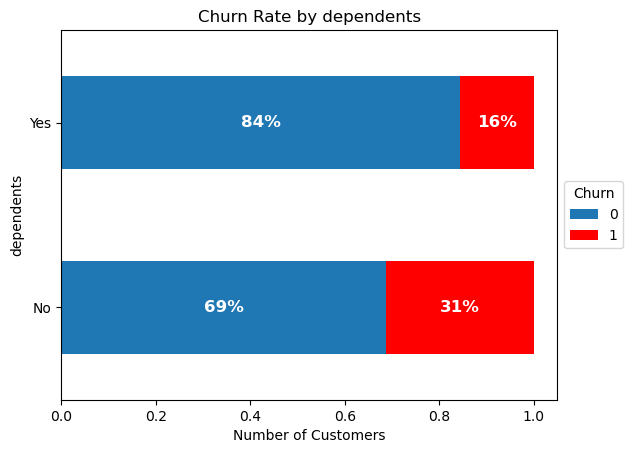

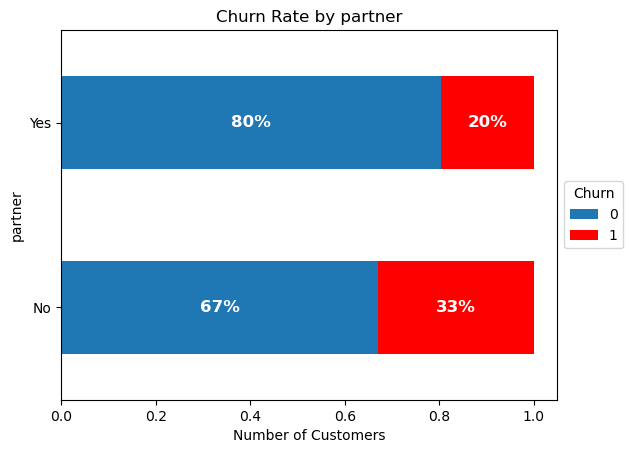

In [17]:
bar_stack(df,'dependents')
bar_stack(df,'partner')


dari visualisasi diatas kita dapat mengetahui bahwa : <br>
- kebanyakkan yang tidak memiliki partner lebih banyak yang churn dibandingkan dengan yang memiliki partner. <br>
- Kebanyakkan yang churn tidak memiliki dependents. <br>

informasi masih terlalu general, perlu dilakukan kondisi untuk melihat cross dari partner dengan dependets dengan rule sebagai berikut : <br>
- No parner dan no dependents dilabeli dengan 0
- Dependents only dilabeli dengan 1
- partnert only dilabeli dengan 2
- dependents dan parnert yes dilabeli dengan 3

In [18]:
dependents_only = (df['dependents'] == 'Yes') & (df['partner']=='No')
partner = (df['dependents'] == 'No') & (df['partner']=='Yes')
dependents_partner = (df['dependents'] == 'Yes') & (df['partner']=='Yes')\

df['dependents_partner'] = np.where(
    dependents_only,1,(
    np.where(partner,2,(
        np.where(dependents_partner,3,0)
            )
        )   
    )
)

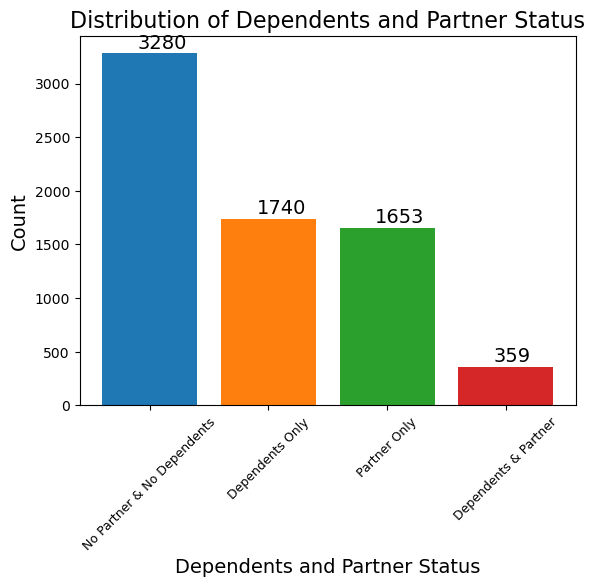

<Figure size 1200x1200 with 0 Axes>

In [19]:
data = {'No Partner & No Dependents': 3280,
        'Dependents Only': 1740,
        'Partner Only': 1653,
        'Dependents & Partner': 359}

plt.bar(data.keys(), data.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for i, v in enumerate(data.values()):
    plt.text(i - 0.1, v + 50, str(v), color='black', fontsize=14)


plt.xlabel('Dependents and Partner Status', fontsize=14)
plt.xticks(fontsize=9,rotation=45)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Dependents and Partner Status', fontsize=16)

# adjust the figure size
plt.figure(figsize=(12, 12))

# show the plot
plt.show()

Dapat dilihat bahwa mayoritas pelanggan (sekitar 51%) tidak memiliki dependents maupun partner. Sekitar 29% pelanggan memiliki dependents saja, sementara 27% memiliki partner saja , dan hanya sekitar 15% pelanggan yang memiliki kedua-duanya Hal ini menunjukkan bahwa mayoritas pelanggan merupakan pelanggan individual atau single.

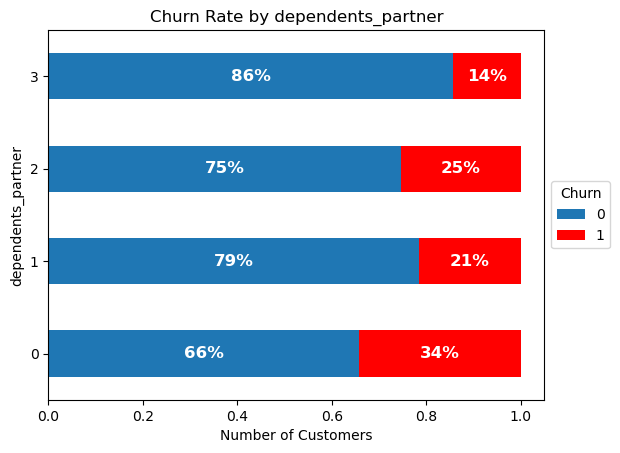

In [20]:
bar_stack(df,'dependents_partner')

Dari data yang ada, terlihat bahwa mayoritas pelanggan yang berhenti berlangganan adalah pelanggan single dengan persentase 34% dari total pelanggan single. Sedangkan pelanggan yang memiliki partner dan dependent memiliki churn rate yang lebih rendah, yaitu hanya sebesar 14% dari total pelanggan di kategori tersebut. Hal ini menunjukkan bahwa keberadaan partner dan dependent dapat berdampak positif terhadap retensi pelanggan.

<Axes: xlabel='dependents_partner', ylabel='monthlycharges'>

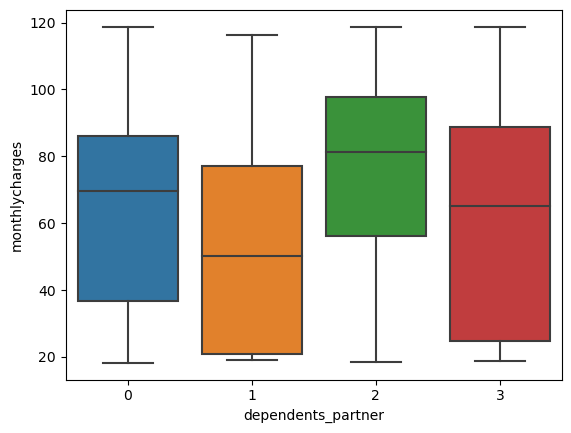

In [21]:
#bagaimana dengan beban bulanan dari tiap category
sns.boxplot(data=df,x='dependents_partner',y='monthlycharges')

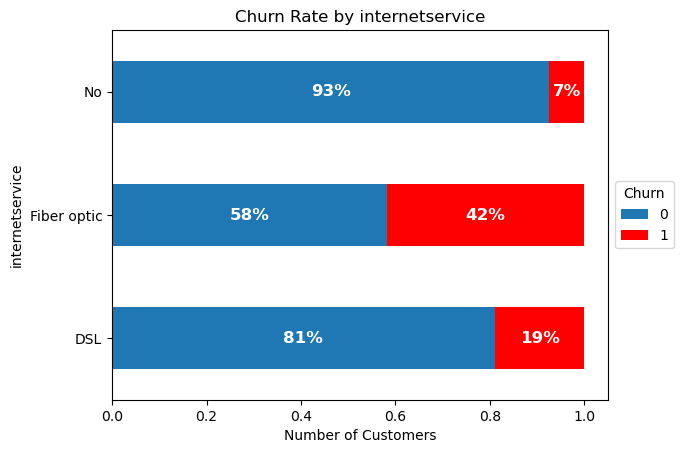

In [22]:
bar_stack(df,'internetservice')

Dari analisis yang dilakukan, ternyata customer yang mengambil layanan internet service fiber optic merupakan segmentasi pelanggan yang memiliki churn rate tertinggi, yaitu sebesar 42%. Ini artinya, dari total pelanggan yang menggunakan layanan tersebut, hampir separuhnya memutuskan untuk berhenti berlangganan.

internetservice,DSL,Fiber optic,No
contract,,,
Month-to-month,1223,2128,524
One year,570,539,363
Two year,623,429,633


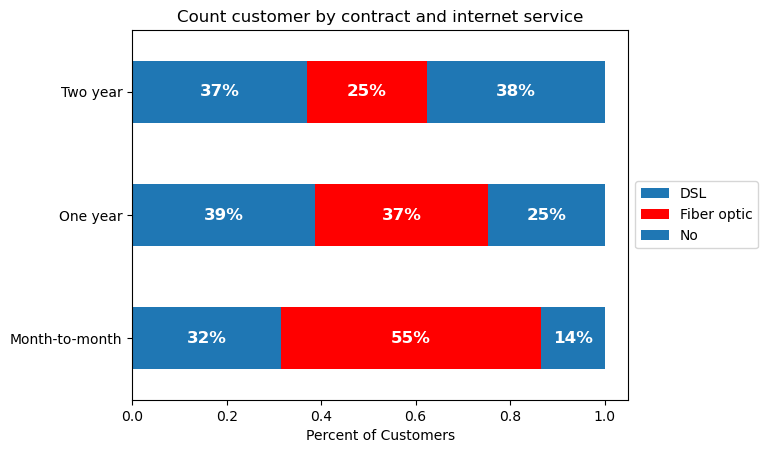

In [23]:
# create crosstab and normalize the values
ct = pd.crosstab(df['contract'], df['internetservice'])
display(ct)
ct_pct = ct.apply(lambda x: x / x.sum(), axis=1)

# plot stacked horizontal bar chart
ax = ct_pct.plot(kind='barh', stacked=True, color=['#1f77b4', 'red'])

# add annotations
for i in ax.containers:
    # get the sum of values in each container
    total = sum(j.get_width() for j in i)
    
    for j in i:
        # get the width and height of the bar
        width = j.get_width()
        height = j.get_height()
        
        # calculate the position of the text
        x = j.get_x() + width / 2
        y = j.get_y() + height / 2
        
        # format the text as percentage
        text = f'{width:.0%}'
        
        # set the position and format of the annotation
        ax.annotate(text, xy=(x, y), xytext=(0, 0), textcoords='offset points',
                    ha='center', va='center', color='white', fontsize=12,
                    fontweight='bold')

# set plot title and labels
ax.set_title(f'Count customer by contract and internet service')
ax.set_xlabel('Percent of Customers')
ax.set_ylabel('')

# show the plot
plt.legend(title='', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Dari data yang diberikan, dapat dilihat bahwa mayoritas pelanggan yang berlangganan internet service adalah dengan menggunakan fiber optic, yaitu sebesar 43% dari total pelanggan. Namun, dari segi churn rate, pelanggan yang mengambil internet service dengan fiber optic memiliki churn rate tertinggi, yaitu sebesar 42%.

Ketika kita melihat mengenai tipe internet service yang diambil oleh pelanggan berdasarkan jenis kontrak yang mereka pilih, dapat dilihat bahwa mayoritas pelanggan dengan kontrak month-to-month menggunakan internet service fiber optic. Sedangkan pelanggan dengan kontrak one year dan two year cenderung lebih memilih internet service dengan tipe DSL.

Hal ini dapat dijadikan masukan bagi perusahaan untuk lebih memperhatikan penggunaan internet service fiber optic, khususnya bagi pelanggan dengan kontrak month-to-month, dan mungkin melakukan evaluasi atau peningkatan pada kualitas layanan tersebut untuk meminimalisir churn rate.

In [24]:
df.to_csv("telco_churn_clean.csv",index=False)

# Machine Learning

In [2]:
from autogluon.tabular import TabularDataset,TabularPredictor

In [3]:
data = TabularDataset("telco_churn_clean.csv")
type(data)

autogluon.core.dataset.TabularDataset

In [4]:
data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,dependents_partner
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


In [5]:
#splitting data
train_size = 5625
seed = 42

train_data = data.sample(train_size,random_state=42)
test_data = data.drop(train_data.index )

In [6]:
#path 
save_path = 'predictor_churn'

predictor = TabularPredictor(label='churn',path=save_path).fit(train_data,  presets='best_quality')
predictor.leaderboard(test_data, silent=True)

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "predictor_churn\"
AutoGluon Version:  0.7.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    5625
Train Data Columns: 20
Label Column: churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    18092.46 MB
	Train Data (Original)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI_BAG_L1,0.819474,0.804089,0.650809,0.155501,8.383922,0.650809,0.155501,8.383922,1,True,10
1,CatBoost_BAG_L1,0.816631,0.807822,0.094170,0.047009,30.612521,0.094170,0.047009,30.612521,1,True,7
2,WeightedEnsemble_L2,0.816631,0.807822,0.101171,0.051907,32.082512,0.007001,0.004899,1.469990,2,True,14
3,NeuralNetTorch_BAG_L1,0.815920,0.803378,0.221360,0.080363,11.659065,0.221360,0.080363,11.659065,1,True,12
4,LightGBMXT_BAG_L1,0.815210,0.801956,0.723135,0.059988,1.521172,0.723135,0.059988,1.521172,1,True,3
5,XGBoost_BAG_L1,0.812367,0.805333,0.269506,0.054586,1.360255,0.269506,0.054586,1.360255,1,True,11
6,LightGBM_BAG_L1,0.803838,0.802133,0.106803,0.053520,1.600475,0.106803,0.053520,1.600475,1,True,4
7,RandomForestEntr_BAG_L1,0.799574,0.788800,0.139567,0.242382,0.541860,0.139567,0.242382,0.541860,1,True,6
8,ExtraTreesEntr_BAG_L1,0.798863,0.782400,0.132262,0.172100,0.447688,0.132262,0.172100,0.447688,1,True,9
9,RandomForestGini_BAG_L1,0.796020,0.788267,0.153001,0.177122,0.504672,0.153001,0.177122,0.504672,1,True,5


LightGBMXT_BAG_L1 memiliki performa cukup oke meskipun secara score validation masih kala dengan NeuralNetFastAI_BAG_L1, namun dengan mempertimbangkan waktu fit maka dipilih LightGBMXT_BAG_L1

In [7]:
## Evaluate
y_test = test_data['churn']

test_feature = test_data.drop("churn",axis=1)

In [8]:
model_to_use = predictor.get_model_names()[4]
y_pred = predictor.predict(test_feature,model=model_to_use)

In [9]:
predictor.evaluate_predictions(y_true=y_test,y_pred=y_pred,auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.7960199004975125
Evaluations on test data:
{
    "accuracy": 0.7960199004975125,
    "balanced_accuracy": 0.707930565010211,
    "mcc": 0.4572752624818442,
    "f1": 0.581021897810219,
    "precision": 0.6745762711864407,
    "recall": 0.5102564102564102
}


{'accuracy': 0.7960199004975125,
 'balanced_accuracy': 0.707930565010211,
 'mcc': 0.4572752624818442,
 'f1': 0.581021897810219,
 'precision': 0.6745762711864407,
 'recall': 0.5102564102564102}

In [10]:
eksplain = predictor.feature_importance(test_data,model=model_to_use)

Computing feature importance via permutation shuffling for 20 features using 1407 rows with 5 shuffle sets...
	14.07s	= Expected runtime (2.81s per shuffle set)
	1.61s	= Actual runtime (Completed 5 of 5 shuffle sets)


<Axes: >

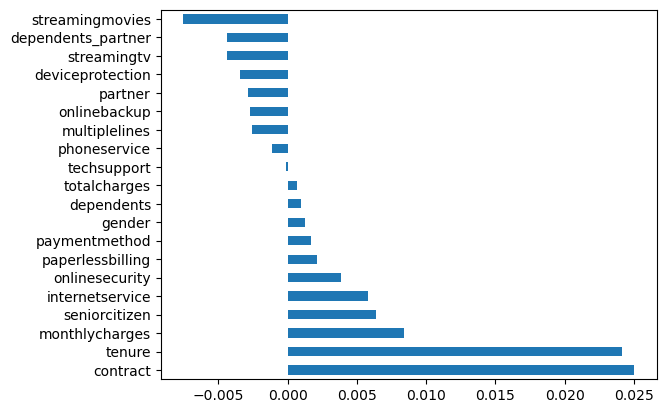

In [11]:
eksplain['importance'].plot(kind='barh')